<a href="https://colab.research.google.com/github/ogreen8084/ML_AutoML/blob/main/H2O_AutoKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/telco_churn.csv')

The dataframe has 20 features and one target column "Churn". We will use the 20 features to predict whether the customer was retained or not. 

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


At first glance there seems to be 17 categorical features and 3 numerical features, but there seems to be an issue with the TotalCharges columns, we will have to convert it to a numerical column as well. SeniorCitizen is already in binary form, we will convert the other "Yes/No" columns to this format as well
.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


There is an issue where TotalCharges is blank for 11 instances in the data. We will remove those rows. 

In [ ]:
num_issues= 0
for i in df['TotalCharges']: 
    try:
        float(i)
    except:
        print(i)
        num_issues += 1
print('There are ' + str(num_issues) + ' invalid values.')

 
 
 
 
 
 
 
 
 
 
 
There are 11 invalid values.


In [ ]:
df = df[df['TotalCharges'] != ' ']

We now have 7032 rows of data.

In [ ]:
df.shape

(7032, 21)

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

We'll now explore the remaining categorical features.

In [ ]:
object_cols = df.select_dtypes(include='object')

In [ ]:
for col in object_cols:
    print("Column " + col + " has " + str(df[col].nunique()) + " unique values." )

Column customerID has 7032 unique values.
Column gender has 2 unique values.
Column Partner has 2 unique values.
Column Dependents has 2 unique values.
Column PhoneService has 2 unique values.
Column MultipleLines has 3 unique values.
Column InternetService has 3 unique values.
Column OnlineSecurity has 3 unique values.
Column OnlineBackup has 3 unique values.
Column DeviceProtection has 3 unique values.
Column TechSupport has 3 unique values.
Column StreamingTV has 3 unique values.
Column StreamingMovies has 3 unique values.
Column Contract has 3 unique values.
Column PaperlessBilling has 2 unique values.
Column PaymentMethod has 4 unique values.
Column Churn has 2 unique values.


There do not appear to be any extremely rare categorical values in our dataset. With that, we can proceed to converting the features to numeric binary, ordinal or dummy form. 

All Yes/No features will be converted to binary. For the remaining features, either customers don't have service, they have service (with the exception of PaymentMethod) customers don't have the feature or they have the feature. As a result, we will convert those features to ordinal form. PaymentMethod will be converted to dummy values as there is not a clear ordering for this feature.


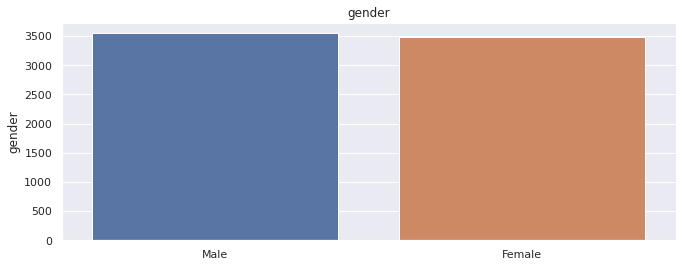

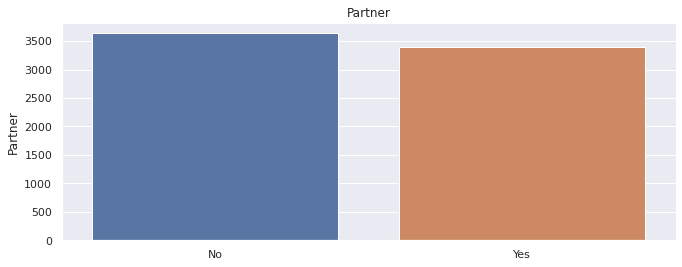

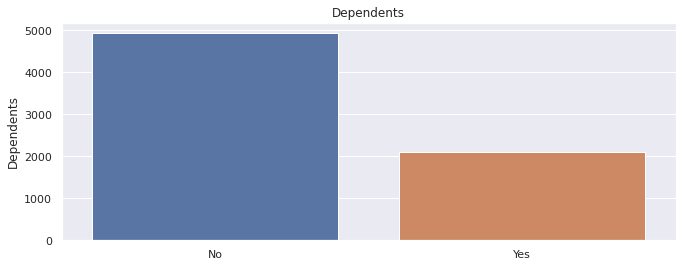

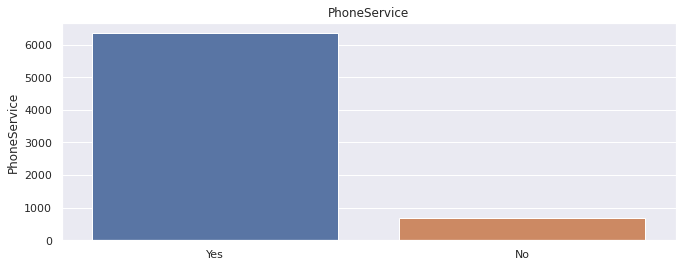

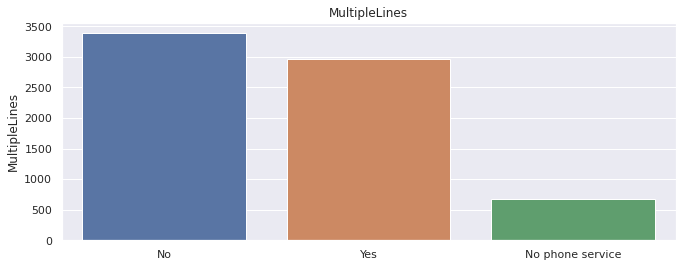

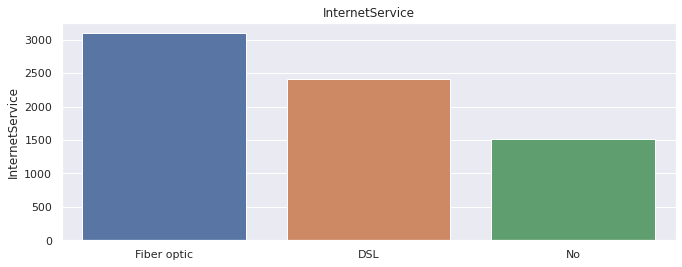

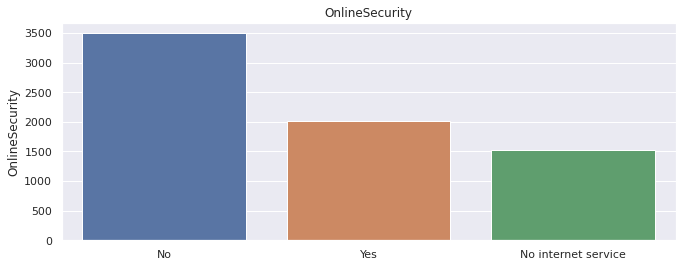

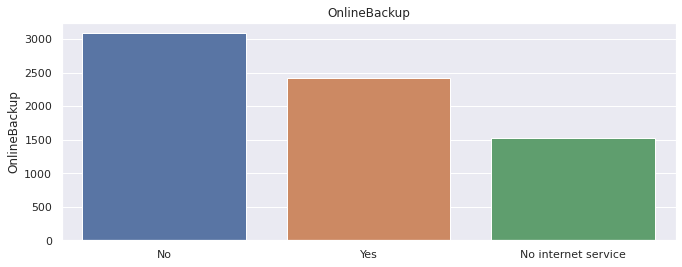

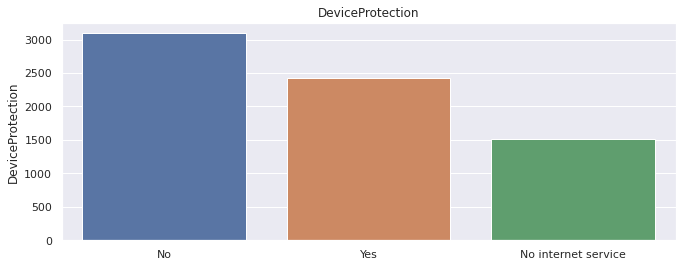

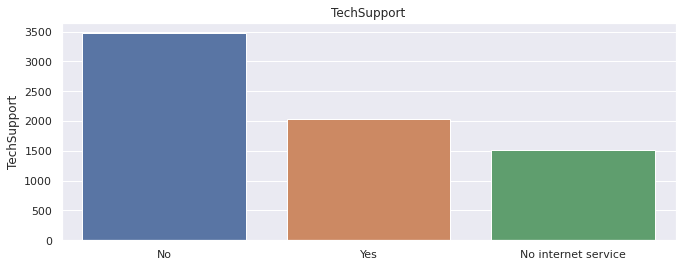

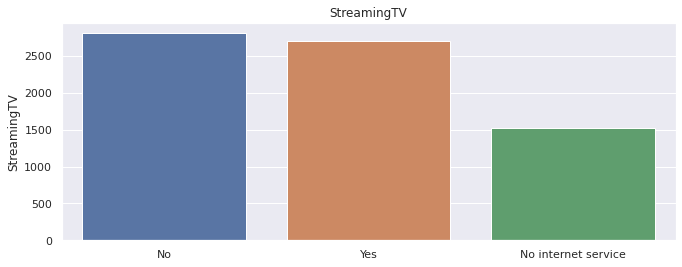

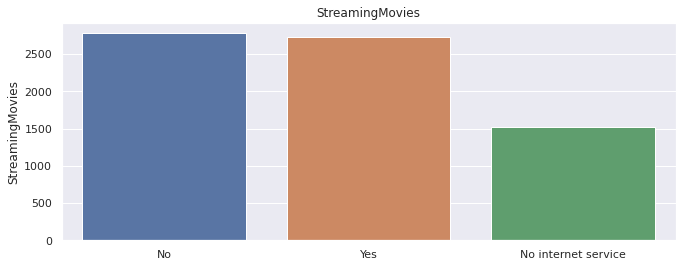

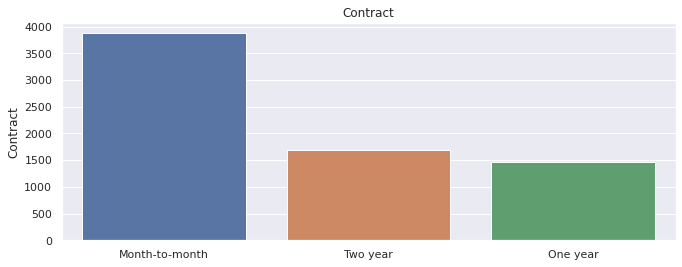

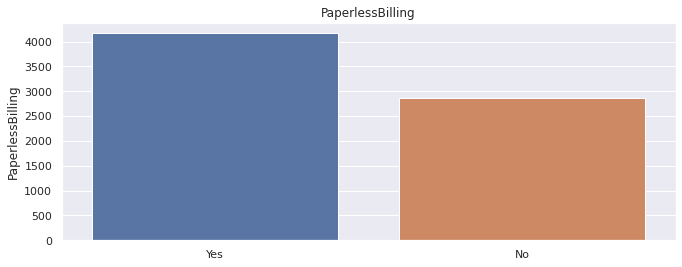

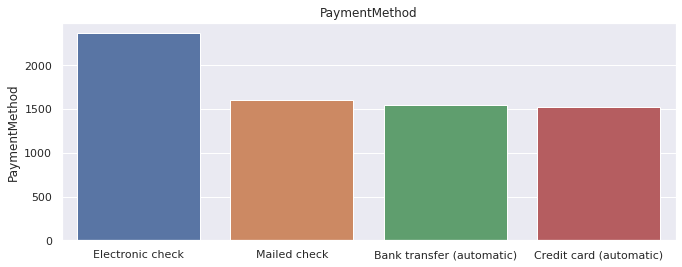

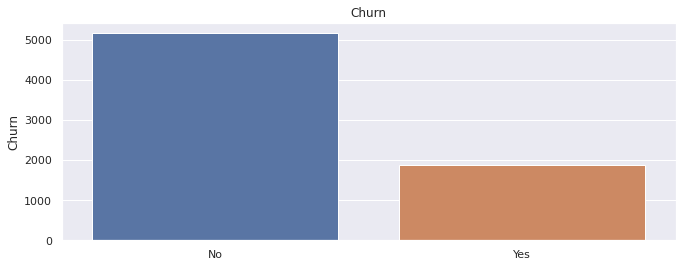

In [ ]:
sns.set(rc={'figure.figsize':(11,4)})

for col in object_cols:
    if col != 'customerID':
        sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts()).set_title(col)
        plt.show()


In [ ]:
yes_no = []
ordinal = []
other = []
for col in object_cols:
    if col == 'customerID':
        pass
    elif col == 'contract':
        contract.append(col)
    elif df[col].nunique() == 3:
        ordinal.append(col)
    elif df[col].nunique() == 2:
        yes_no.append(col)
    else:
        other.append(col)

In [ ]:
yes_no

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

Charts of binary values vs. Churn

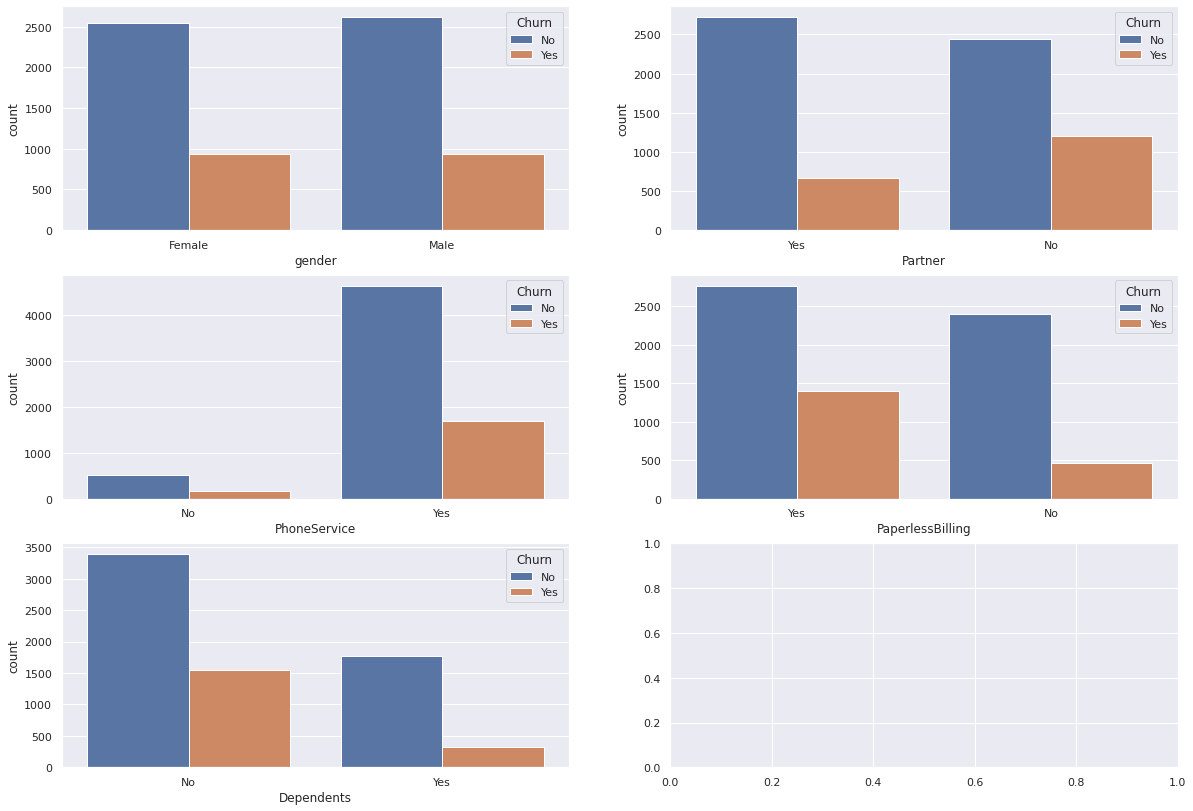

In [ ]:
fig, axlist = plt.subplots(3, 2, figsize=(20, 14))
sns.countplot(x='gender', hue='Churn', data=df, ax=axlist[0][0])
sns.countplot(x='Partner', hue='Churn', data=df, ax=axlist[0][1])
sns.countplot(x='PhoneService', hue='Churn', data=df, ax=axlist[1][0])
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, ax=axlist[1][1])
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axlist[2][0])


In [ ]:
ordinal

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract']

Charts of ordinal values vs. Churn

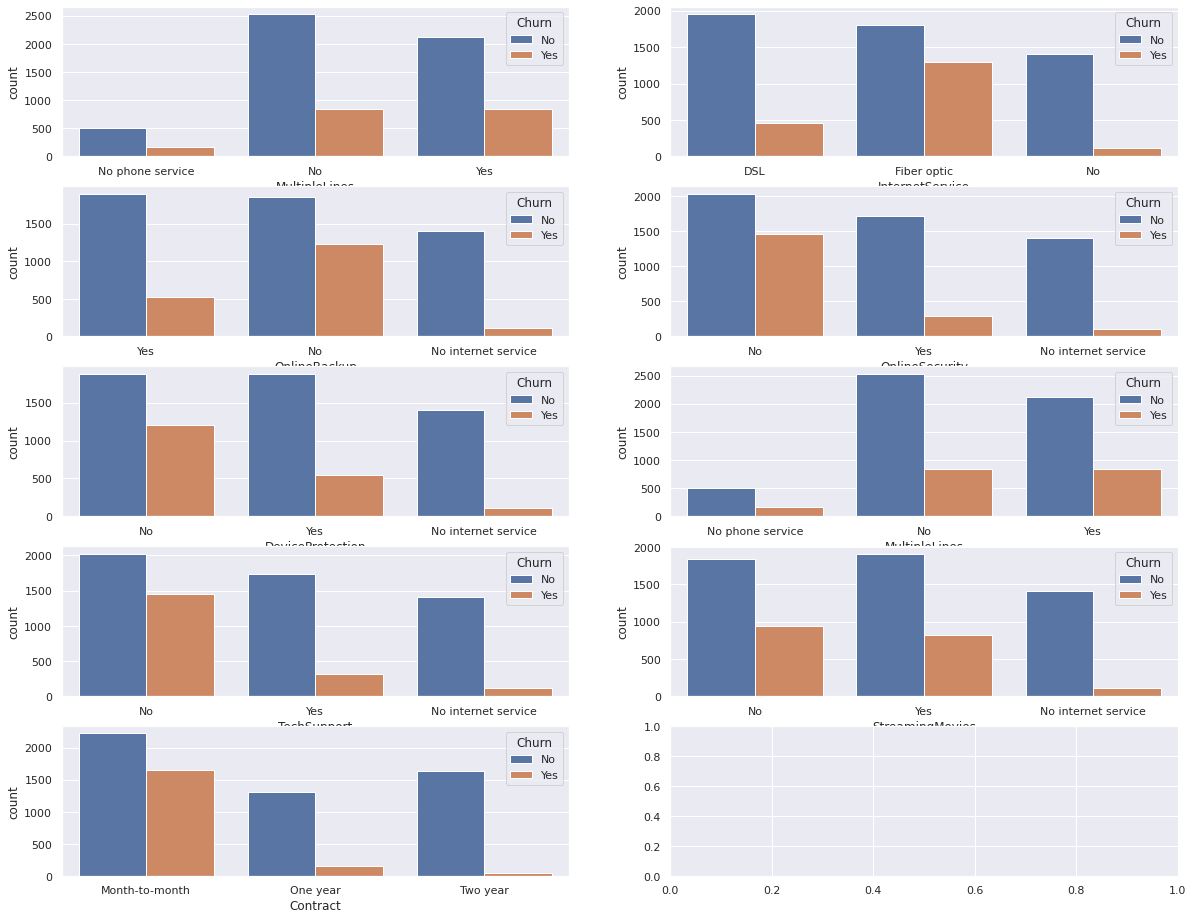

In [ ]:
fig, axlist = plt.subplots(5, 2, figsize=(20, 16))
sns.countplot(x='MultipleLines', hue='Churn', data=df, ax=axlist[0][0])
sns.countplot(x='InternetService', hue='Churn', data=df, ax=axlist[0][1])
sns.countplot(x='OnlineBackup', hue='Churn', data=df, ax=axlist[1][0])
sns.countplot(x='OnlineSecurity', hue='Churn', data=df, ax=axlist[1][1])
sns.countplot(x='DeviceProtection', hue='Churn', data=df, ax=axlist[2][0])
sns.countplot(x='MultipleLines', hue='Churn', data=df, ax=axlist[2][1])
sns.countplot(x='TechSupport', hue='Churn', data=df, ax=axlist[3][0])
sns.countplot(x='StreamingMovies', hue='Churn', data=df, ax=axlist[3][1])
sns.countplot(x='Contract', hue='Churn', data=df, ax=axlist[4][0])


Chart of payment method vs. Churn

In [ ]:
other

['PaymentMethod']

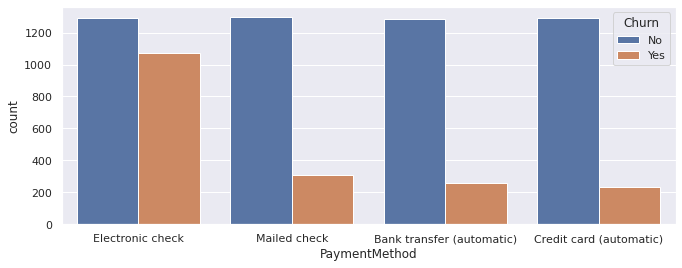

In [ ]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)

In [ ]:
yes_no_map = {"Yes":1, "No": 0}
ordinal_map = {"Yes": 2, "No": 1, "No internet service": 0, "No phone service": 0}
isp_map = {"Fiber optic": 2, "DSL": 1, "No": 0}
contract_map = {"Two year": 2, "One year": 1, "Month-to-month": 0}
mf_map = {"Male": 1, "Female": 0}

for col in yes_no:
    if col == 'gender':
        df[col] = df[col].map(mf_map)
    else:
        df[col] = df[col].map(yes_no_map)

for col in ordinal:
    if col == 'Contract':
        df[col] = df[col].map(contract_map)
    elif col == 'InternetService':
        df[col] = df[col].map(isp_map)
    else:
        df[col] = df[col].map(ordinal_map)


In [ ]:
df.drop(columns=['customerID'], inplace=True)

In [ ]:
df = pd.get_dummies(df)

We will also drop the customerID column, we now have all columns in numerical form. Note that monthly charges is a higher level of magnitude, as a result, we will scale all values by a MinMaxScaler before we proceed with model training for the manual models.

In [ ]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,1.325228,1.224118,1.070392,1.128697,...,1.172213,0.688567,0.592719,64.798208,2283.300441,0.265785,0.219283,0.216297,0.336320,0.228100
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.642585,0.778643,0.705562,0.737917,...,0.758252,0.832934,0.491363,30.085974,2266.771362,0.441782,0.413790,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(df.drop(columns=['Churn']), df[['Churn']], test_size=0.25, random_state=231)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Xtrain_m = Xtrain.copy()
Xtest_m = Xtest.copy()

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(Xtrain_m)
Xtrain_m = min_max_scaler.transform(Xtrain_m)
Xtest_m = min_max_scaler.transform(Xtest_m)

We will run manual models with no model tuning using Logistic Regression, LightGBM and Deep Learning (TensorFlow)

# Logistic Regression



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [ ]:
lr = LogisticRegression()

lr.fit(Xtrain_m, ytrain) 
ypred_train = lr.predict(Xtrain_m)
ypred_test = lr.predict(Xtest_m)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy_score(ytrain, ypred_train)

0.8035646568069776

In [ ]:
accuracy_score(ytest, ypred_test)

0.8060295790671217

# LightGBM

In [ ]:
#from: https://www.kaggle.com/code/slavikonnikov/lightgbm-gpu-baseline-model-for-google-colab
# After running
#uncomment next line 
#! git clone --recursive https://github.com/Microsoft/LightGBM

#You can run this oneliner which will build and compile LightGBM with GPU enabled in colab:
#uncomment next line
#! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;    

In [ ]:
import lightgbm as lgb

In [ ]:
lgbc = lgb.LGBMClassifier(max_depth=9, learning_rate=0.05, bagging_freq=8)

In [ ]:
lgbc.fit(Xtrain_m, ytrain) 

ypred_train = lgbc.predict(Xtrain_m)
ypred_test = lgbc.predict(Xtest_m)

[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1419, number of negative: 3855
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 5274, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269056 -> initscore=-0.999419
[LightGBM] [Info] Sta

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
accuracy_score(ytrain, ypred_train)

0.8485020857034509

In [ ]:
accuracy_score(ytest, ypred_test)

0.8020477815699659

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax, Dropout

In [ ]:
def model_tf(inp_shape):
    model = Sequential([
    Dense(64, activation='relu', input_shape=(inp_shape,)),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model 

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_path = 'model_checkpoints/checkpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                            frequency='epoch',
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)

In [ ]:
model = model_tf(Xtrain_m.shape[1])

In [ ]:
model.fit(Xtrain_m, ytrain, batch_size=64, epochs=30, validation_data=(Xtest_m, ytest), callbacks=[checkpoint])

Epoch 1/30
70/83 [========================>.....] - ETA: 0s - loss: 0.5313 - accuracy: 0.7299
Epoch 1: val_loss did not improve from 0.40449
83/83 [==============================] - 1s 6ms/step - loss: 0.5206 - accuracy: 0.7368 - val_loss: 0.4207 - val_accuracy: 0.7890
Epoch 2/30
70/83 [========================>.....] - ETA: 0s - loss: 0.4494 - accuracy: 0.7761
Epoch 2: val_loss did not improve from 0.40449
83/83 [==============================] - 0s 4ms/step - loss: 0.4509 - accuracy: 0.7755 - val_loss: 0.4154 - val_accuracy: 0.7969
Epoch 3/30
68/83 [=======================>......] - ETA: 0s - loss: 0.4428 - accuracy: 0.7877
Epoch 3: val_loss did not improve from 0.40449
83/83 [==============================] - 0s 4ms/step - loss: 0.4435 - accuracy: 0.7854 - val_loss: 0.4101 - val_accuracy: 0.8038
Epoch 4/30
83/83 [==============================] - ETA: 0s - loss: 0.4393 - accuracy: 0.7899
Epoch 4: val_loss did not improve from 0.40449
83/83 [==============================] - 0s 4ms/s

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = model_tf(Xtrain_m.shape[1])
model.load_weights(checkpoint_path)

In [ ]:
model.evaluate(Xtrain_m, ytrain)

165/165 [==============================] - 1s 2ms/step - loss: 0.4094 - accuracy: 0.8085


[0.40940508246421814, 0.808494508266449]

In [ ]:
model.evaluate(Xtest_m, ytest)

55/55 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8111


[0.40205591917037964, 0.8111490607261658]

# Auto ML with H2O

In [ ]:
#uncomment next line
#!pip install h2o

In [ ]:
from h2o.automl import H2OAutoML
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpffvy55qq
  JVM stdout: /tmp/tmpffvy55qq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpffvy55qq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_c600as
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/telco_churn.csv')

In [ ]:
df = df[df['TotalCharges'] != ' ']

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
hf = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
Xtrain, Xtest = hf.split_frame(ratios=[0.75])

In [ ]:
Xtrain

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes


In [ ]:
y = 'Churn'
x = Xtrain.columns
x.remove('customerID')
x.remove(y)


In [ ]:
aml = H2OAutoML(max_runtime_secs=1200, max_models=20, seed=231, nfolds=5)

In [ ]:
aml.train(x=x, y=y, training_frame=Xtrain)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20220925_153127

No summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.11322760642659926
RMSE: 0.3364931001173713
LogLoss: 0.35541661553772225
AUC: 0.8988037318882014
AUCPR: 0.7776193395782413
Gini: 0.7976074637764028
Null degrees of freedom: 5303
Residual degrees of freedom: 5298
Null deviance: 6165.051315282894
Residual deviance: 3770.259457624158
AIC: 3782.259457624158

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34143582399587713
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3218  665    0.1713   (665.0/3883.0)
Yes    298   1123   0.2097   (298.0/1421.0)
Total  3516  1788   0.1816   (963.0/5304.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.341436     0.699907  208
max f2                       0.207832     0.796023  269
max f0point5                 0.575681     0.726881  113
max accuracy                 0.545375     0.839932  126
max precision                0.889546     1         0
max recall                   0.0151062    1         386
max specificity              0.889546     1         0
max absolute_mcc             0.402325     0.583436  182
max min_per_class_accuracy   0.318339     0.810713  218
max mean_per_class_accuracy  0.281829     0.817738  233
max tns                      0.889546     3883      0
max fns                      0.889546     1419      0
max fps                      0.00498838   3883      399
max tps                      0.0151062    1421      386
max tnr                      0.889546     1         0
max fnr                      0.889546     0.998593  0
max fpr                      0.00498838   1         399
max tpr                      0.0151062    1         386

Gains/Lift Table: Avg response rate: 26.79 %, avg score: 26.61 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010181                    0.838061           3.66346    3.66346            0.981481         0.856421    0.981481                    0.856421            0.0372977       0.0372977                  266.346   266.346            0.0370401
2        0.0201735                   0.820176           3.66216    3.66281            0.981132         0.829542    0.981308                    0.843107            0.0365939       0.0738916                  266.216   266.281            0.0733766
3        0.0301659                   0.798748           3.66216    3.6626             0.981132         0.808629    0.98125                     0.831686            0.0365939       0.110486                   266.216   266.26             0.109713
4        0.0401584                   0.77785            3.45088    3.60992            0.924528         0.789009    0.967136                    0.821067            0.0344828       0.144968                   245.088   260.992            0.143166
5        0.0501508                   0.754166           3.2396     3.53613            0.867925         0.76504     0.947368                    0.809904            0.0323716       0.17734                    223.96    253.613            0.173734
6        0.100113                    0.662994           2.9579     3.24756            0.792453         0.706046    0.870056                    0.758072            0.147783        0.325123   

In [ ]:
leaders = aml.leaderboard

In [ ]:
leaders

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20220925_153127,0.848556,0.413103,0.671471,0.236371,0.366525,0.13434
StackedEnsemble_AllModels_1_AutoML_1_20220925_153127,0.848039,0.413613,0.670158,0.236969,0.366711,0.134477
GBM_grid_1_AutoML_1_20220925_153127_model_1,0.846568,0.415508,0.670218,0.239517,0.367241,0.134866
GBM_1_AutoML_1_20220925_153127,0.844727,0.417749,0.666151,0.241569,0.368535,0.135818
XGBoost_grid_1_AutoML_1_20220925_153127_model_1,0.844365,0.418684,0.662252,0.238713,0.368919,0.136101
GLM_1_AutoML_1_20220925_153127,0.843669,0.420686,0.651771,0.235275,0.369984,0.136888
GBM_5_AutoML_1_20220925_153127,0.842543,0.420259,0.663439,0.242792,0.370078,0.136958
GBM_grid_1_AutoML_1_20220925_153127_model_2,0.841327,0.42207,0.657927,0.245283,0.370294,0.137118
DeepLearning_grid_3_AutoML_1_20220925_153127_model_1,0.840555,0.425301,0.650099,0.240314,0.371596,0.138084
DeepLearning_grid_2_AutoML_1_20220925_153127_model_1,0.840375,0.424207,0.648952,0.238929,0.371614,0.138097


In [ ]:
aml.leader.model_performance(Xtest)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.12936143839825395
RMSE: 0.3596685118247828
LogLoss: 0.4022908605926034
AUC: 0.8549046107700893
AUCPR: 0.664669938823258
Gini: 0.7098092215401786
Null degrees of freedom: 1727
Residual degrees of freedom: 1722
Null deviance: 1978.466159239726
Residual deviance: 1390.3172142080375
AIC: 1402.3172142080375

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36964508050830175
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     1066  214    0.1672   (214.0/1280.0)
Yes    126   322    0.2812   (126.0/448.0)
Total  1192  536    0.1968   (340.0/1728.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.369645     0.654472  184
max f2                       0.186866     0.756654  273
max f0point5                 0.499248     0.65501   130
max accuracy                 0.499248     0.818866  130
max precision                0.882735     1         0
max recall                   0.00529993   1         399
max specificity              0.882735     1         0
max absolute_mcc             0.373611     0.522897  182
max min_per_class_accuracy   0.294241     0.782031  218
max mean_per_class_accuracy  0.292811     0.783092  219
max tns                      0.882735     1280      0
max fns                      0.882735     446       0
max fps                      0.00529993   1280      399
max tps                      0.00529993   448       399
max tnr                      0.882735     1         0
max fnr                      0.882735     0.995536  0
max fpr                      0.00529993   1         399
max tpr                      0.00529993   1         399

Gains/Lift Table: Avg response rate: 25.93 %, avg score: 26.13 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0104167                   0.825025           3.42857    3.42857            0.888889         0.851116    0.888889                    0.851116            0.0357143       0.0357143                  242.857   242.857            0.0341518
2        0.0202546                   0.799724           3.40336    3.41633            0.882353         0.812665    0.885714                    0.83244             0.0334821       0.0691964                  240.336   241.633            0.0660714
3        0.0300926                   0.78297            2.4958     3.11538            0.647059         0.790476    0.807692                    0.818721            0.0245536       0.09375                    149.58    211.538            0.0859375
4        0.0405093                   0.758503           3.42857    3.19592            0.888889         0.766905    0.828571                    0.805397            0.0357143       0.129464                   242.857   219.592            0.120089
5        0.0503472                   0.737465           3.17647    3.19212            0.823529         0.747365    0.827586                    0.794057            0.03125         0.160714                   217.647   219.212            0.148996
6        0.100116                    0.647619           2.69103    2.94302            0.697674         0.692484    0.763006                    0.743564            0.133929        0.294643                   169.103   194.302            0.262612
7        0.150463                    0.584212           2.30542    2.72967            0.597701         0.612847    0.

# Auto Keras

In [ ]:
#uncomment the next two lines
#!pip install git+https://github.com/keras-team/keras-tuner.git
#!pip install autokeras

In [ ]:
import autokeras as ak

In [ ]:
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=4
)

clf.fit(Xtrain_m, ytrain, epochs=20)

Trial 4 Complete [00h 00m 28s]
val_accuracy: 0.8009523749351501

Best val_accuracy So Far: 0.8066666722297668
Total elapsed time: 00h 01m 54s
Epoch 1/20
165/165 [==============================] - 2s 4ms/step - loss: 0.4813 - accuracy: 0.7700
Epoch 2/20
165/165 [==============================] - 1s 4ms/step - loss: 0.4446 - accuracy: 0.7933
Epoch 3/20
165/165 [==============================] - 1s 4ms/step - loss: 0.4347 - accuracy: 0.8002
Epoch 4/20
165/165 [==============================] - 1s 3ms/step - loss: 0.4298 - accuracy: 0.8002
Epoch 5/20
165/165 [==============================] - 1s 3ms/step - loss: 0.4262 - accuracy: 0.8024
Epoch 6/20
165/165 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.8049
Epoch 7/20
165/165 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.8068
Epoch 8/20
165/165 [==============================] - 1s 4ms/step - loss: 0.4174 - accuracy: 0.8074
Epoch 9/20
165/165 [==============================] - 1s 3

In [ ]:
model = clf.export_model()

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 22)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 22)               45        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                736       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [ ]:
ypred_test = model.evaluate(Xtest_m, ytest)

55/55 [==============================] - 1s 7ms/step - loss: 0.4183 - accuracy: 0.7986
